# Clustering

In [1]:
# libraries
    
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for graphis, charts
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# importing files

file_cs = r'C:/Users/mrroo/Desktop/Work stuff/Kaggle/Customer Segmentation/marketing_campaign.csv'

df = pd.read_csv(file_cs)

df.iloc[:12]

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
5,7446\t1967\tMaster\tTogether\t62513\t0\t1\t09-...
6,965\t1971\tGraduation\tDivorced\t55635\t0\t1\t...
7,6177\t1985\tPhD\tMarried\t33454\t1\t0\t08-05-2...
8,4855\t1974\tPhD\tTogether\t30351\t1\t0\t06-06-...
9,5899\t1950\tPhD\tTogether\t5648\t1\t1\t13-03-2...


In [3]:
# editing the dataframe

df.shape

print(list(df.index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [4]:
columns = df.columns.str.split('\t', expand = True)

for col in columns:
    print(col)

('ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response')


In [5]:
columns_as_first_row = pd.DataFrame([df.columns.values], columns=df.columns)

df = pd.concat([columns_as_first_row, df], ignore_index=True)

df.columns = ['AllData']


In [6]:

clean_df = df['AllData'].str.split('\t', expand=True)

clean_df.columns = clean_df.iloc[0]
clean_df = clean_df.drop(index = 0)
# view data

pd.set_option('display.max_rows', None)  # Set to None for unlimited rows
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns

clean_df.sample(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
448,1137,1964,Graduation,Single,81246,0,0,29-12-2013,87,398,190,537,61,156,37,1,4,5,7,1,1,0,0,1,0,0,3,11,0
483,8346,1974,Graduation,Single,32233,1,0,19-08-2012,26,138,15,35,25,11,72,2,6,2,2,9,1,0,0,0,0,0,3,11,1
471,2021,1975,Graduation,Married,61456,0,1,27-03-2013,47,563,76,384,84,192,89,4,6,10,13,4,0,0,0,0,0,0,3,11,0
423,6528,1982,Master,Together,18492,1,0,05-06-2014,75,2,2,2,2,1,1,1,1,0,2,8,0,0,0,0,0,0,3,11,0
1999,5370,1973,PhD,Married,32644,1,0,16-01-2013,38,239,3,141,0,7,23,4,7,1,6,8,1,0,0,0,0,0,3,11,0
1359,1065,1963,Graduation,Single,80695,0,0,29-12-2013,85,557,129,984,193,37,18,1,5,8,5,2,0,0,0,0,0,0,3,11,0
805,3483,1958,Graduation,Married,48192,0,0,06-04-2013,76,1039,43,204,153,58,29,3,2,8,12,8,0,1,0,1,1,0,3,11,1
2103,1241,1984,2n Cycle,Married,14796,1,0,17-09-2012,1,13,3,8,7,4,16,2,1,0,3,9,0,0,0,0,0,0,3,11,1
1951,6663,1940,PhD,Single,51141,0,0,08-07-2013,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0
787,1135,1960,Master,Together,17144,1,1,15-02-2014,96,18,2,19,0,2,6,5,3,0,4,7,0,0,0,0,0,0,3,11,0


In [7]:
# checking nan values

clean_df.isnull().sum()

clean_df.iloc[0]

0
ID                           5524
Year_Birth                   1957
Education              Graduation
Marital_Status             Single
Income                      58138
Kidhome                         0
Teenhome                        0
Dt_Customer            04-09-2012
Recency                        58
MntWines                      635
MntFruits                      88
MntMeatProducts               546
MntFishProducts               172
MntSweetProducts               88
MntGoldProds                   88
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        1
Name: 1, dty

In [8]:
# we now work on different objects

clean_df.dtypes

# as we can see that all the columns are of object type
# so we will convert the columns into numeric once

for cols in clean_df.columns:
    clean_df[cols] = pd.to_numeric(clean_df[cols], errors = 'ignore')
    
clean_df.isnull().sum()

0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# find the numeric colums

numeric_data = clean_df.select_dtypes(include = [np.number])

numeric_data.columns

# find the object columns

categorical_data = clean_df.select_dtypes(include = 'object')

categorical_data.columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object', name=0)

# Statistics

In [10]:
# find the statistics of numerical data

numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


In [11]:
numeric_data['Income'][numeric_data['Income'].isnull().index]

# we will impute NA vlaues with median for the Income column 

numeric_data['Kidhome'].unique() # not a binary variable

numeric_data['Teenhome'].unique() # not a binary variable

numeric_data['Recency'].unique() # not a binary variable

numeric_data['AcceptedCmp5'].unique() # not a binary variable

# ID, Z_CostContact and Z_Revenue, does not have any unique value. Hence it does not contribute much. We will drop them

# AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain and Response are binary

array([0, 1], dtype=int64)

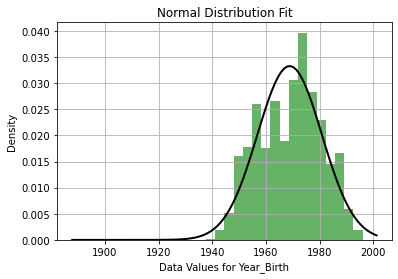

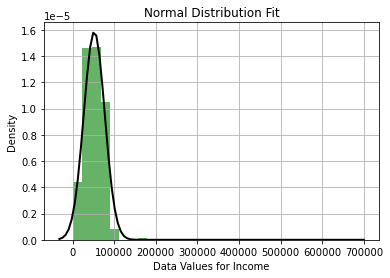

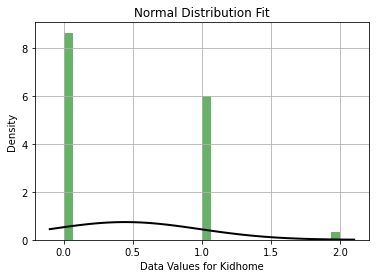

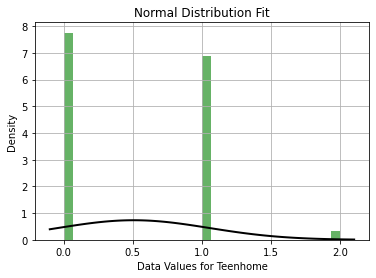

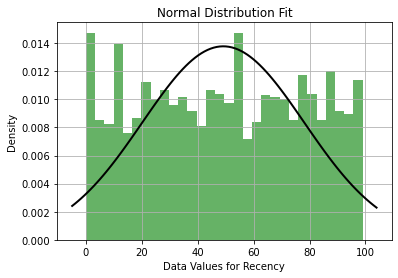

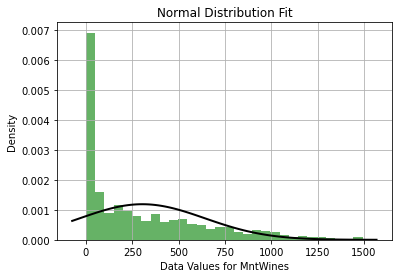

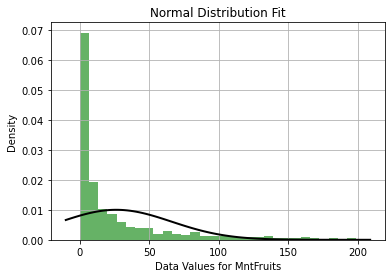

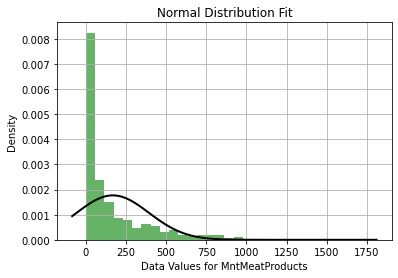

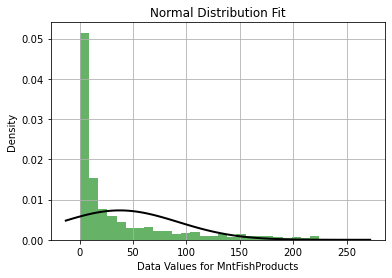

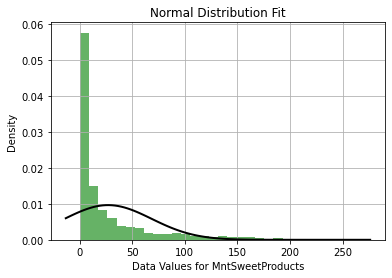

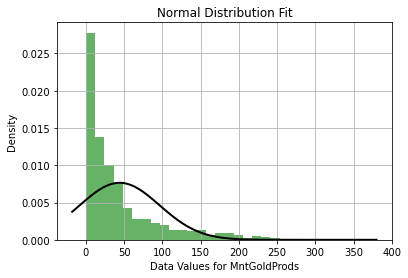

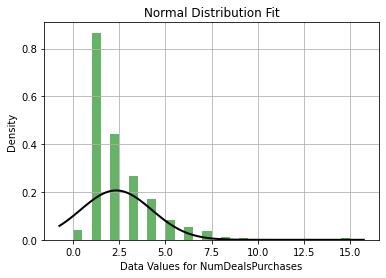

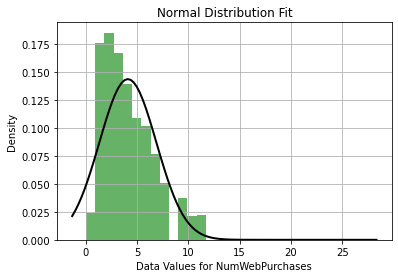

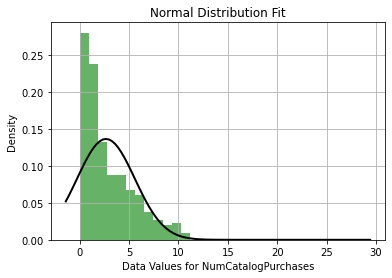

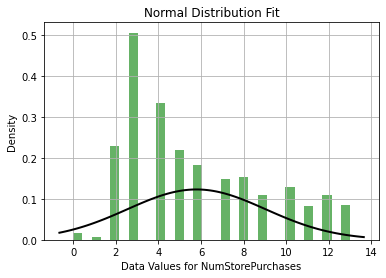

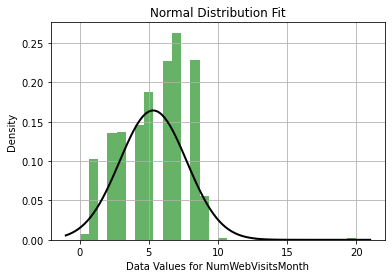

In [12]:
# We will check the distribution of the numerical variables

numeric_data.columns

dist_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

# create a graph depicting a normal distribution of all the numerical features

# create a function that plots the data for single column or feature
def createNormaldist(data, column):
    data_clean = data[~np.isnan(data)]
    mu,std = norm.fit(data_clean)
    # plot
    plt.hist(data_clean, bins=30, density=True, alpha=0.6, color='g')
    
    # Plot the fitted normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel('Data Values for '+column)
    plt.ylabel('Density')
    plt.title('Normal Distribution Fit')
    plt.grid(True)
    plt.show()
    
# iterating the function overall the numerical features

for col in dist_cols:
    createNormaldist(numeric_data[col], col)
    print("")

No handles with labels found to put in legend.


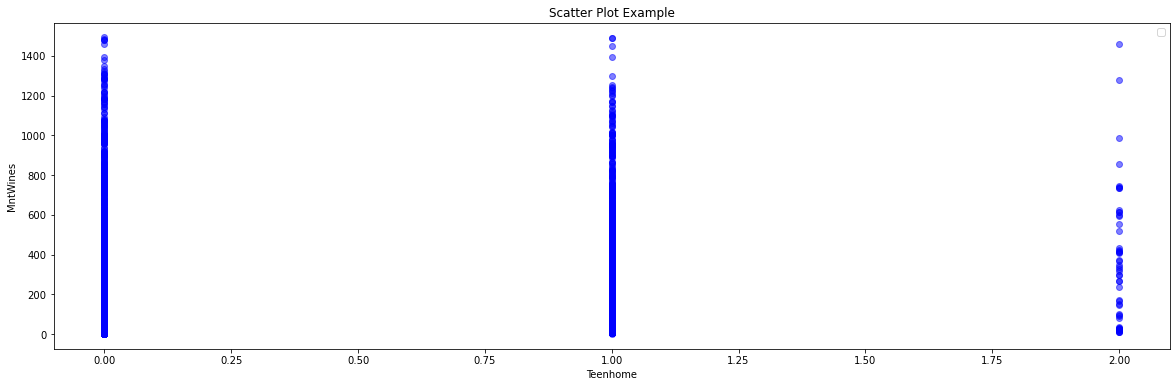

In [13]:
# just for fun 

# Create a scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(numeric_data['Teenhome'],numeric_data['MntWines'], color='blue', alpha=0.5)


# Add title and labels
plt.title('Scatter Plot Example')
plt.xlabel('Teenhome')
plt.ylabel('MntWines')
plt.legend()

# Show plot
plt.show()

No handles with labels found to put in legend.


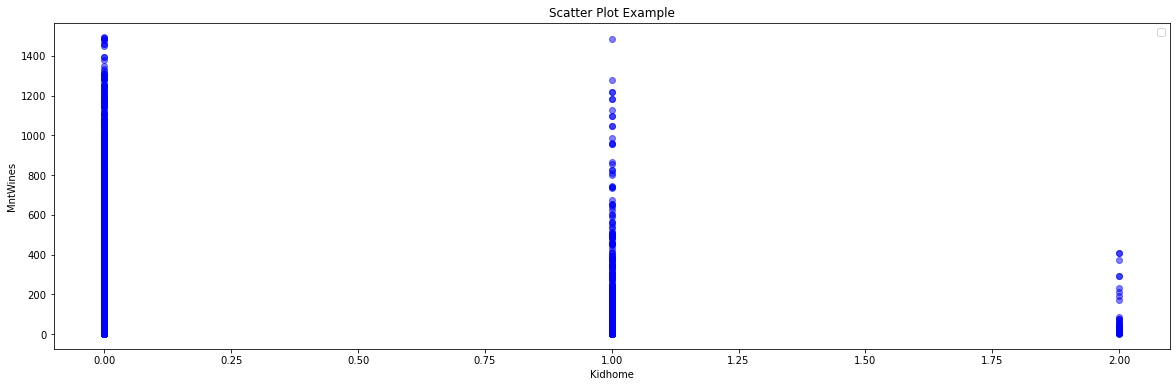

In [16]:
# just for fun part 2

# Create a scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(numeric_data['Kidhome'],numeric_data['MntWines'], color='blue', alpha=0.5)


# Add title and labels
plt.title('Scatter Plot Example')
plt.xlabel('Kidhome')
plt.ylabel('MntWines')
plt.legend()

# Show plot
plt.show()

In [17]:
# Categorical Statistics

categorical_data.describe().T

,count,unique,top,freq
0,,,,
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [18]:
# Dt_Customer

clean_df['Dt_Customer'] = pd.to_datetime(clean_df['Dt_Customer'])

np.sin(2 * np.pi * clean_df['Dt_Customer'].dt.day/31)

clean_df['Dt_Customer'].dt.month

clean_df['Dt_Customer']

1      2012-04-09
2      2014-08-03
3      2013-08-21
4      2014-10-02
5      2014-01-19
6      2013-09-09
7      2012-11-13
8      2013-08-05
9      2013-06-06
10     2014-03-13
11     2013-11-15
12     2012-11-13
13     2013-11-15
14     2013-11-15
15     2012-10-10
16     2012-11-24
17     2012-12-24
18     2012-08-31
19     2013-03-28
20     2012-03-11
21     2012-08-08
22     2013-06-01
23     2012-12-23
24     2014-11-01
25     2013-03-18
26     2013-02-01
27     2013-05-27
28     2013-02-20
29     2013-05-31
30     2013-11-22
31     2014-05-22
32     2013-11-05
33     2012-10-10
34     2012-10-29
35     2013-02-20
36     2013-08-29
37     2013-12-31
38     2013-02-09
39     2014-11-02
40     2013-01-02
41     2013-04-29
42     2013-12-03
43     2012-12-24
44     2013-05-11
45     2013-02-10
46     2014-06-28
47     2012-09-11
48     2013-05-24
49     2014-01-01
50     2012-08-11
51     2014-12-05
52     2012-11-08
53     2013-02-01
54     2014-07-06
55     2013-12-06
56     201

# Creating Data Pipelines

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

In [20]:
from sklearn.preprocessing import FunctionTransformer

# feature Engineering for Date and time

def custom_date(clean_df):
    df_out = clean_df.copy()
    df_out['Dt_Customer'] = pd.to_datetime(df_out['Dt_Customer'])
    df_out['day_sin'] = np.sin(2 * np.pi * df_out['Dt_Customer'].dt.day/31)
    df_out['day_cos'] = np.cos(2 * np.pi * df_out['Dt_Customer'].dt.day/31)
    df_out['month_sin'] = np.sin(2 * np.pi * df_out['Dt_Customer'].dt.month/12)
    df_out['month_cos'] = np.cos(2 * np.pi * df_out['Dt_Customer'].dt.month/12)
    df_out['year'] = df_out['Dt_Customer'].dt.year
    
    return df_out

fe_transformer = FunctionTransformer(custom_date)

In [46]:
# Update categorical and numerical columns
categorical_columns = categorical_data.columns
numerical_columns = numeric_data.columns.append(pd.Index(['day_sin', 'day_cos', 'month_sin', 'month_cos', 'year']))

# Remove non required variable from numerical columns
numerical_columns = numerical_columns.drop(['ID','Z_CostContact', 'Z_Revenue'])
categorical_columns = categorical_columns.drop(['Dt_Customer'])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'drop')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('fe', fe_transformer),
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
processed_data = pipeline.fit_transform(clean_df)

In [22]:
### Get the feature names from the ColumnTransformer
def get_feature_names(column_transformer):
    output_features = []
    
    for name, transformer, columns in column_transformer.transformers:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                names = transformer.get_feature_names_out(columns)
            else:
                names = columns
            output_features.extend(names)
        elif name == 'remainder':
            output_features.extend(column_transformer.remainder)
    
    return output_features

In [23]:
# collecting feature names

feature_from_processor = [x for x in get_feature_names(preprocessor) if x not in list(categorical_columns)]

feature_from_onehot = list(pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(categorical_columns))

features_transformed = feature_from_processor+feature_from_onehot

In [49]:
df_processed = pd.DataFrame(data = processed_data, columns = features_transformed)


df_processed.sample(50)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,day_sin,day_cos,month_sin,month_cos,year,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1508,0.183134,1.066340,-0.825218,-0.929894,-1.039832,0.080423,4.292712,0.013516,0.374877,3.027215,-0.172979,-0.685887,-0.750450,1.826532,2.218248,-1.779198,-0.28014,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,-1.330227,0.518891,-1.228688,0.669282,-0.041094,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1178,1.017761,-0.947892,1.032559,0.906934,0.790532,-0.772418,-0.535709,-0.655618,-0.687068,-0.558813,-0.479753,0.349414,-0.750450,-0.910898,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,0.664505,-1.225144,1.201051,-0.758165,-0.041094,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
175,0.516985,1.126103,-0.825218,0.906934,0.237969,2.511169,1.124061,1.249862,0.576280,1.064591,-0.345539,-0.685887,2.489181,1.826532,0.679896,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,1.341224,-0.334756,-0.013818,1.383006,-1.502225,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
211,-1.235733,1.028030,-0.825218,-0.929894,-1.074368,0.918407,-0.108193,0.673786,-0.082858,1.815719,-0.613966,-0.685887,-0.030532,1.142175,0.987567,-1.779198,-0.28014,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,-0.696016,-1.225144,1.388992,-0.044441,1.420036,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
965,-0.818419,0.100471,-0.825218,0.906934,1.308559,-0.317767,2.029389,0.266102,-0.558902,0.773832,1.667660,0.349414,0.329427,-0.226541,1.602907,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,1.341224,-0.334756,-0.013818,1.383006,-0.041094,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
849,0.934298,-1.484717,2.890335,-0.929894,1.619376,-0.879394,-0.611153,-0.673343,-0.687068,-0.413434,-0.498926,0.867064,-0.390491,-0.568720,-0.858455,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,1.173812,0.778228,-1.228688,0.669282,-0.041094,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2086,1.935851,1.388683,-0.825218,-0.929894,0.410645,-0.320739,-0.032749,1.950015,0.539661,-0.243824,0.095447,-0.685887,-0.030532,1.142175,0.372226,-1.367014,-0.28014,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,0.126055,-1.397203,-0.013818,1.383006,-1.502225,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1276,0.516985,-0.594030,1.032559,-0.929894,-1.557860,-0.894252,-0.611153,-0.691069,-0.650449,-0.607273,-0.652312,-0.685887,-1.110409,-0.910898,-1.166125,0.281720,3.56964,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,-0.157566,-1.397203,-0.013818,1.383006,-0.041094,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
589,-0.818419,-1.119230,-0.825218,-0.929894,1.550305,-0.879394,-0.435117,-0.699931,-0.650449,-0.534583,-0.422233,-0.685887,-1.110409,-0.568720,-0.858455,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.116510,-0.097282,-0.418612,-1.124206,-0.850768,-1.228688,-0.758165,-0.041094,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1893,-0.067255,0.376833,-0.825218,0.906934,-0.901692,1.001611,-0.485413,-0.491658,-0.687068,-0.655733,-0.307193,2.937665,2.129222,0.457817,0.064556,1.106087,-0.28014,3.523233,-0.28014,3.815174,-0.116510,-0.097282,-0.418612,1.298717,0.518891,1.388992,-0.044441,1.420036,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.cluster import KMeans

# optimizing K-Means Clustering

def optimize_Kmeans(data, Max_K):
    means=[]
    inertias=[]
    
    for k in range(1, Max_K+1):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Generate the elbow plot
    plt.close()
    fig = plt.subplots(figsize = (10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
  

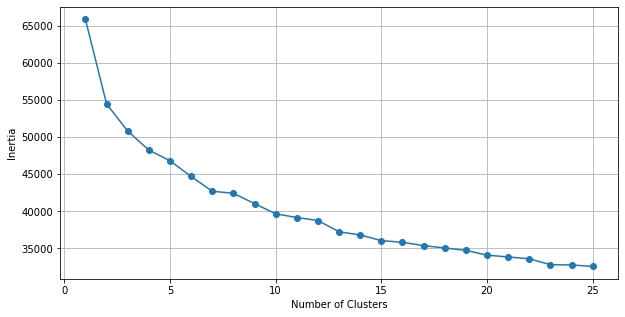

In [50]:
optimize_Kmeans(processed_data,25)

In [90]:
# K-Means clustering

Kmeans = KMeans(n_clusters= 2)
Kmeans.fit(processed_data)
df_processed['clusters'] = Kmeans.labels_

In [55]:
from sklearn.decomposition import PCA

# PCA function

def feature_reduction(data, n):
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(data)
    df_pca = pd.DataFrame(data=principal_components, columns=['PC'+str(i) for i in range(1, n+1)])
    df_pca['clusters'] = data['clusters']
    return df_pca

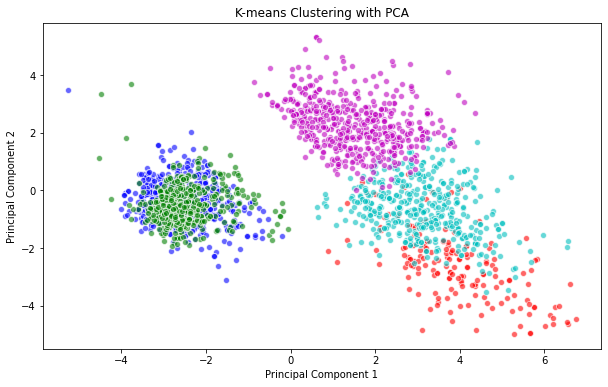

In [80]:
# Plotting in 2D

df_PCA = feature_reduction(df_processed, 2)

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime']

for i in range(15):
    cluster_data = df_PCA[df_PCA['clusters'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()

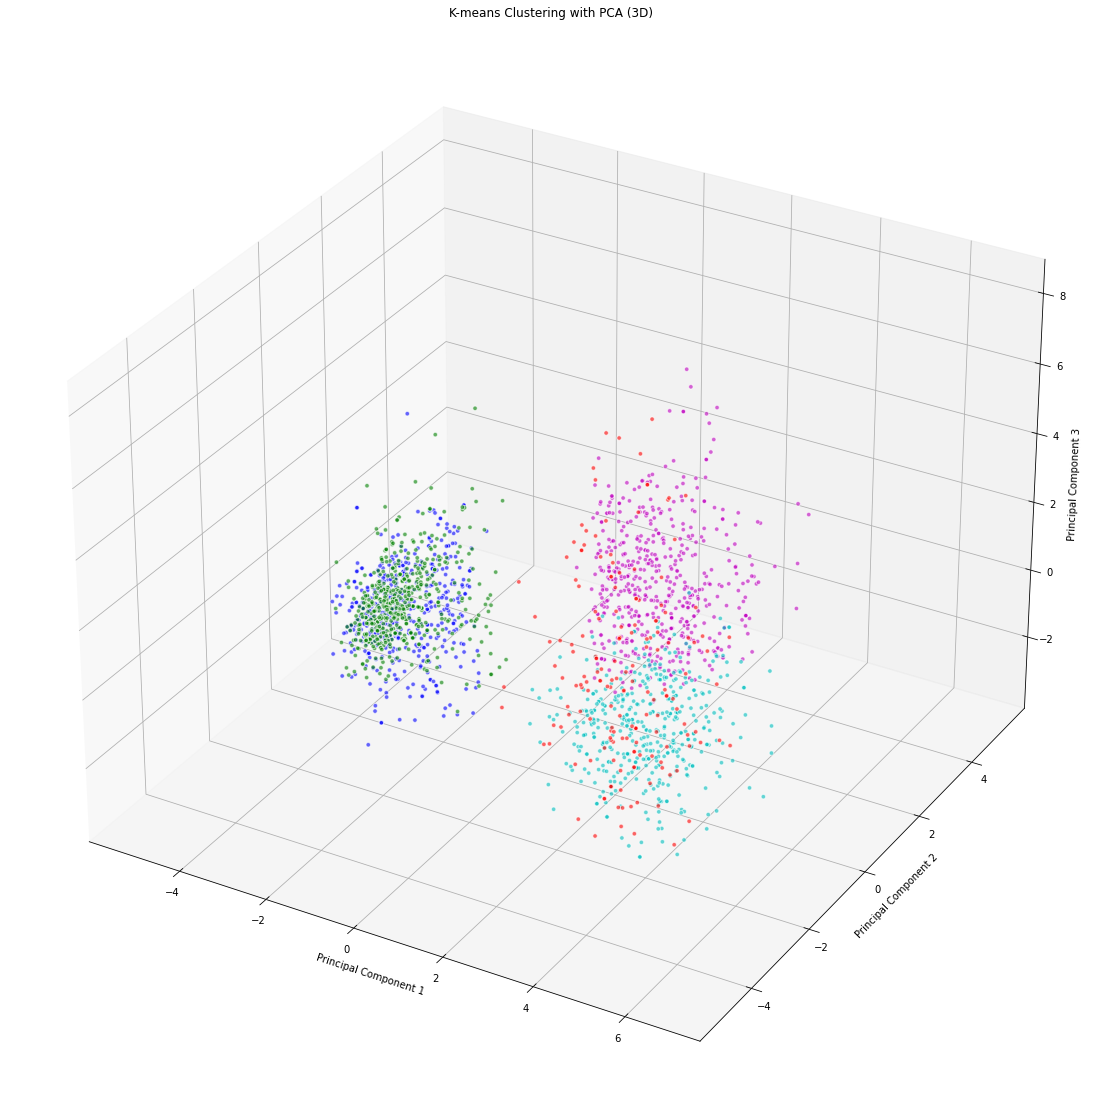

In [81]:
# Plotting in 2D

df_PCA = feature_reduction(df_processed, 3)

fig = plt.figure(figsize=(100, 20))
ax = fig.add_subplot(111, projection='3d')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime']

for i in range(15):
    cluster_data = df_PCA[df_PCA['clusters'] == i]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, edgecolors='w')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-means Clustering with PCA (3D)')
plt.show()

# Let's look at df_processed and cluster items based on real valued columns

In [91]:
# we will first cluster the originial clean data

clean_df['clusters'] = df_processed['clusters']

In [92]:
# then we will view the data frame

clean_df.sample(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusters
360,4107,1948,PhD,Together,46681.0,0,2,2013-08-10,52,269,15,69,15,19,38,2,4,6,4,5,0,0,0,0,0,0,3,11,0,1.0
1241,11086,1984,Basic,Single,25707.0,1,0,2014-01-18,18,1,6,2,3,6,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0,0.0
1696,550,1952,Graduation,Divorced,62335.0,0,1,2013-05-23,87,243,131,217,85,6,26,2,3,3,13,2,0,0,0,0,0,0,3,11,0,0.0
595,3075,1972,PhD,Married,59973.0,0,0,2013-11-09,47,130,30,168,20,34,0,1,3,4,7,1,0,0,0,0,0,0,3,11,0,0.0
2170,4548,1981,Graduation,Single,41967.0,1,1,2013-11-23,66,23,4,10,0,2,15,1,1,0,3,4,0,0,0,0,0,0,3,11,0,0.0
1732,10304,1959,Graduation,Married,18690.0,0,0,2012-12-28,77,6,1,7,23,4,19,1,1,1,2,8,0,0,0,0,0,0,3,11,0,0.0
892,7108,1965,Master,Widow,51390.0,1,1,2012-08-09,54,205,20,47,23,2,56,6,5,2,5,5,0,0,0,0,0,0,3,11,0,1.0
1517,1490,1962,Graduation,Married,55759.0,0,1,2012-11-28,84,675,0,85,10,7,77,5,10,3,8,8,0,0,0,0,0,0,3,11,0,0.0
1857,6710,1951,Master,Single,58217.0,2,1,2012-11-17,84,68,1,13,3,5,13,1,2,0,4,6,0,0,0,0,0,0,3,11,0,0.0
1519,10380,1972,Master,Married,37787.0,1,0,2013-09-20,50,40,1,40,4,3,18,1,3,0,3,8,0,0,0,0,0,0,3,11,0,0.0


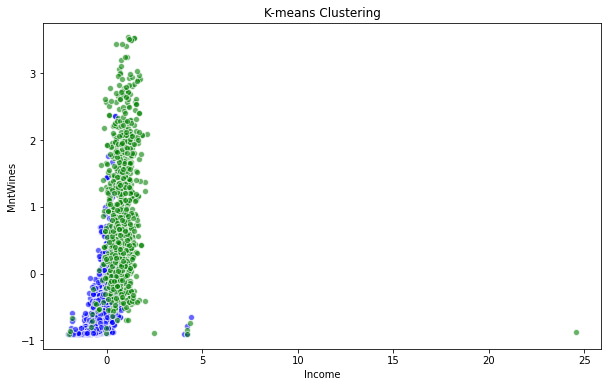

In [96]:
# we will use only 2D graph as we are selecting 2 variables now


plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime']

for i in range(15):
    cluster_data = df_processed[df_processed['clusters'] == i]
    plt.scatter(cluster_data['Income'], cluster_data['MntWines'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, edgecolors='w')

plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('K-means Clustering')
plt.show()